In [1]:
import pandas as pd
import numpy as np
import tqdm
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

from utils.market_parser import load_market, clean_market
from utils.smoothers import exp_smooth

sns.set()
register_matplotlib_converters()

In [2]:
region_ids = [10000043, 10000002]
type_ids = np.arange(34, 41)
start_date = '2015-01-01'
horizons = [7, 14, 28]
derivs = 2
verbose = False

market_data = load_market(region_ids, type_ids, start_date=start_date, verbose=verbose)
data_matrix, data_dims = clean_market(market_data, verbose=verbose)

In [3]:
smooth_data = exp_smooth(data_matrix, horizons, deriv_count=derivs, coef_scaler='factorial')

In [6]:
h = 7
working_data = pd.DataFrame(smooth_data[:,3,0,0,horizons.index(h),:], columns = range(derivs+1), index=data_dims[0])
working_data.insert(0, 'actual', data_matrix[:,3,0,0])
working_data.insert(0, 'error', working_data[0] - working_data['actual'])
working_data = working_data.iloc[1:]

In [7]:
pd.concat([working_data.min(), working_data.max()], axis=1)

,0,1
error,-0.728831,0.851667
actual,3.710000,7.650000
0,3.757239,7.798421
1,-0.099864,0.115427
2,-0.003831,0.003071


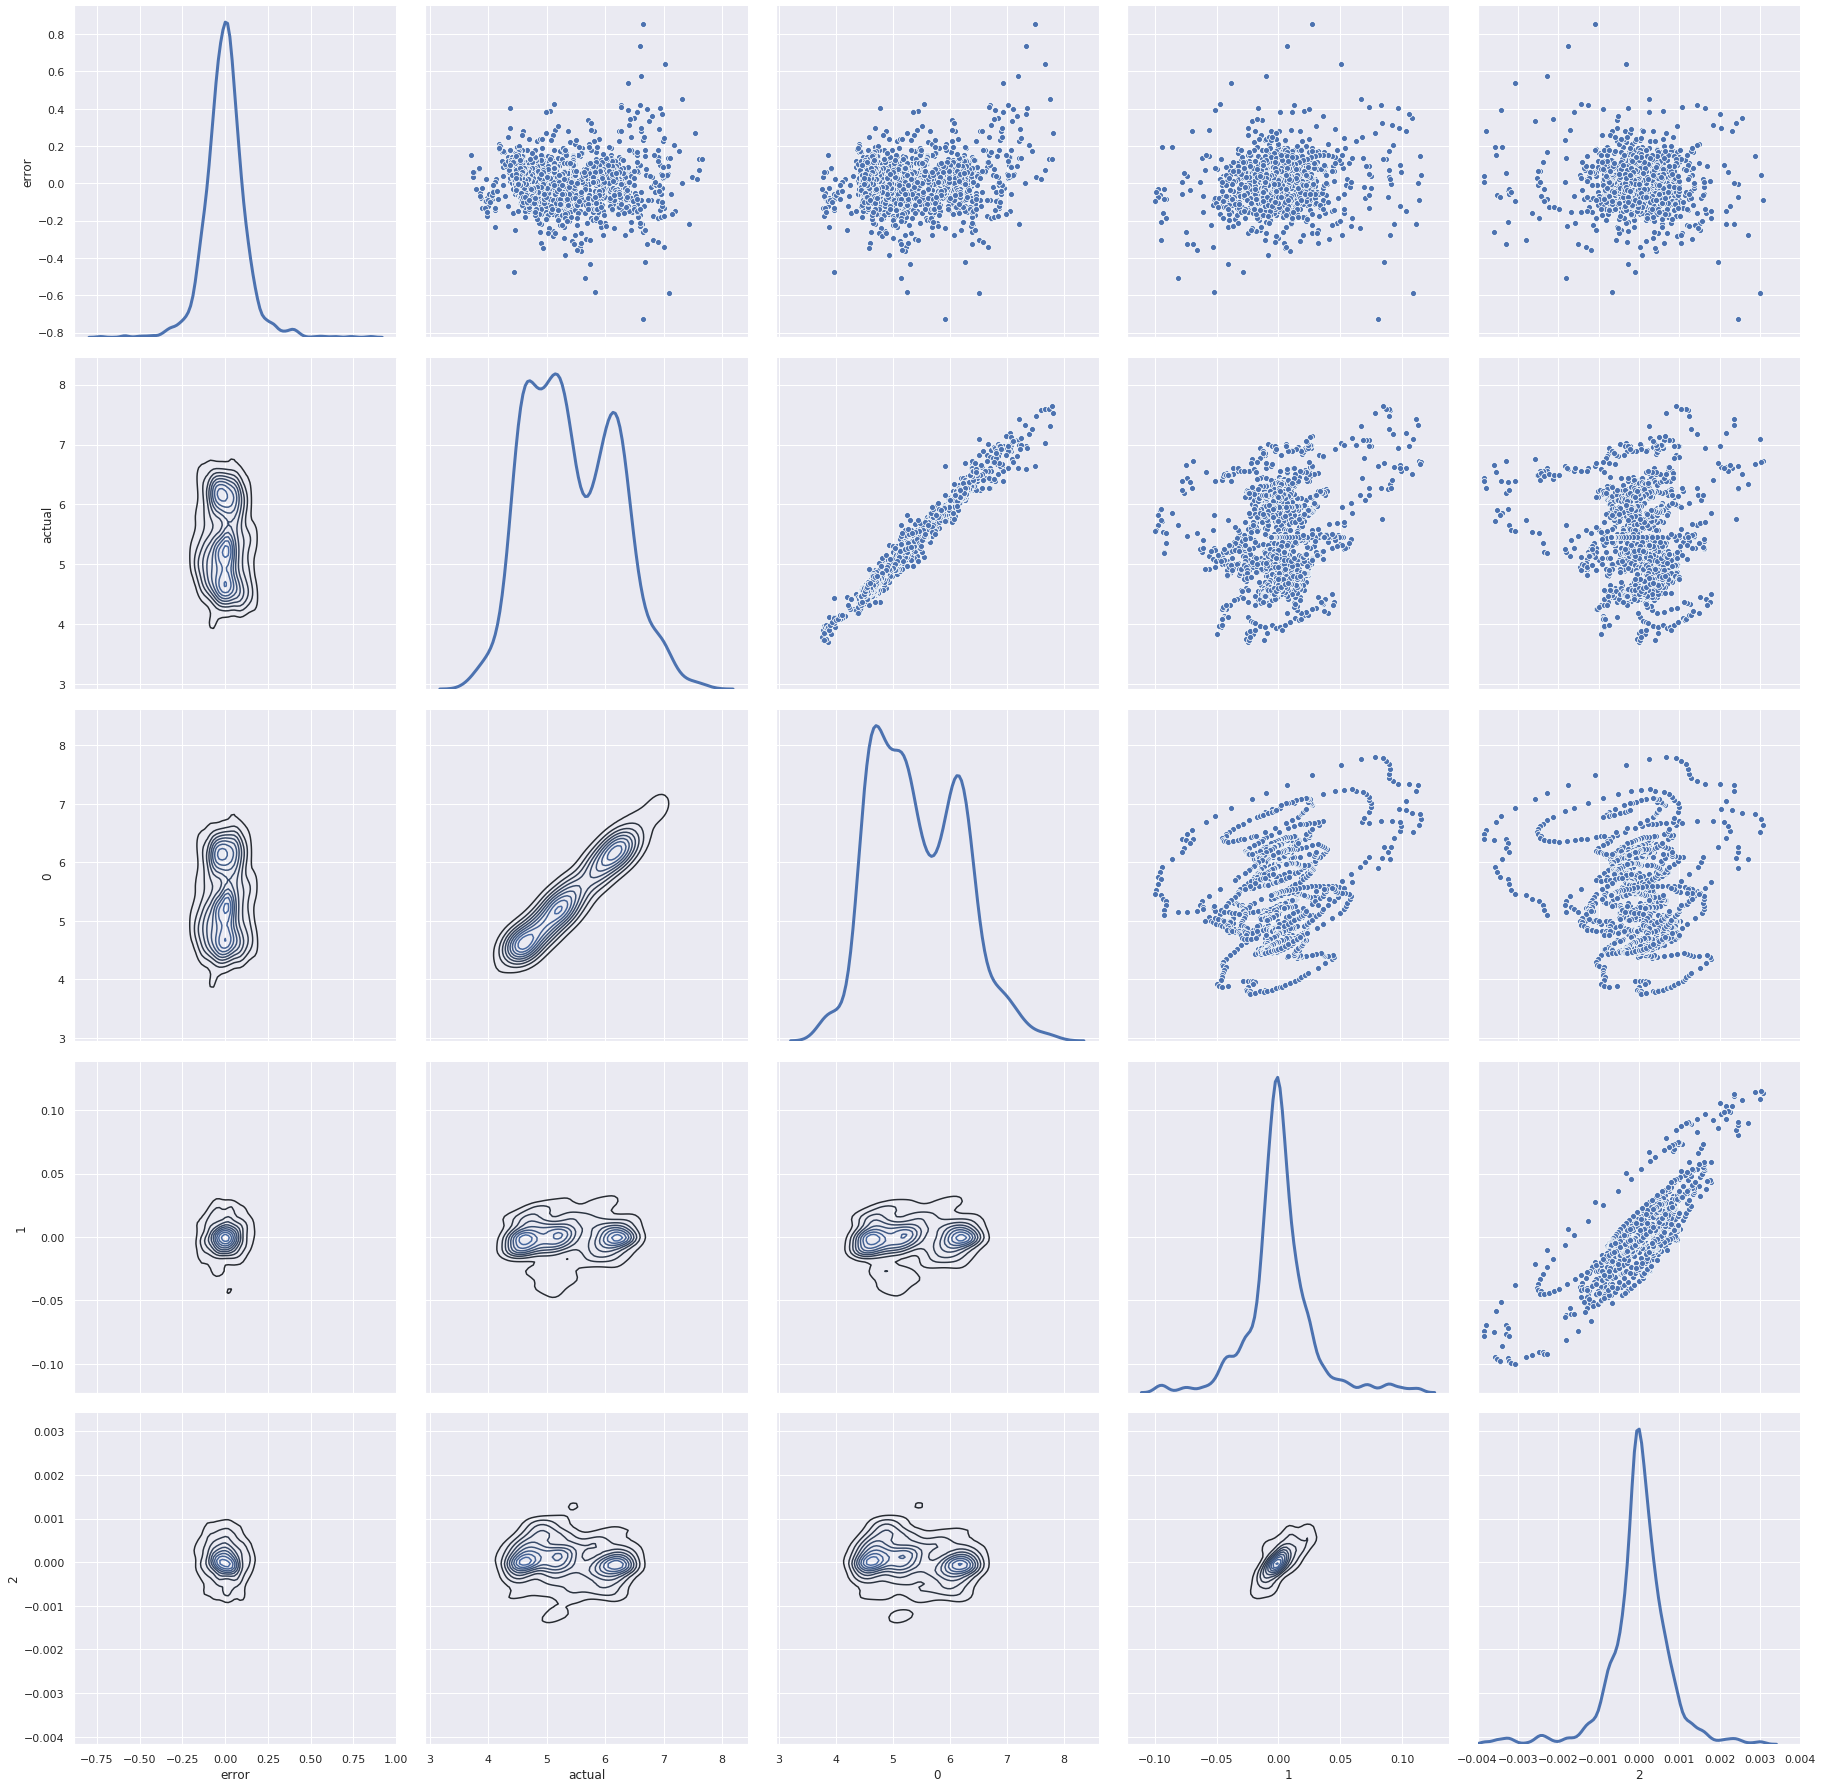

In [11]:
g = sns.PairGrid(working_data, diag_sharey=False, height=5)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)

_ = g.axes[4,4].set_xlim(-0.004, 0.004)

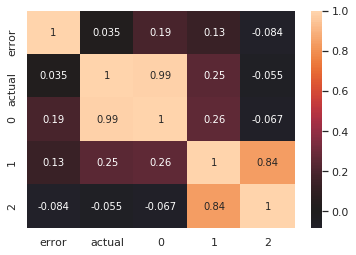

In [12]:
sns.heatmap(pd.DataFrame(
    np.corrcoef(working_data.T),
    index=working_data.columns,
    columns=working_data.columns
), center=0, annot=True)

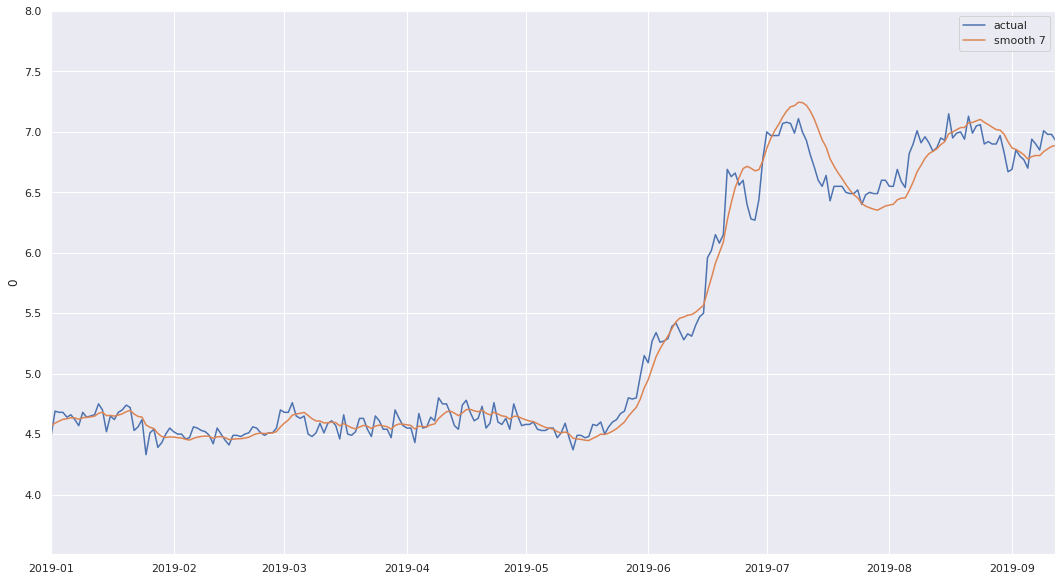

In [13]:
plt.figure(figsize=(18,10))
sns.lineplot(x=working_data.index, y=working_data['actual'], label='actual')
sns.lineplot(x=working_data.index, y=working_data[0], label='smooth %s' % h)
_ = plt.xlim('2019-01-01', working_data.index[-1])